# Titanic survived Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.groupby('Survived').mean('survived')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [7]:
male_ind= len(train[train['Sex']=='male'])
print('No Of Males in Titanic:',male_ind)

No Of Males in Titanic: 577


In [8]:
female_ind= len(train[train['Sex']=='female'])
print('No Of Females in Titanic:',female_ind)

No Of Females in Titanic: 314


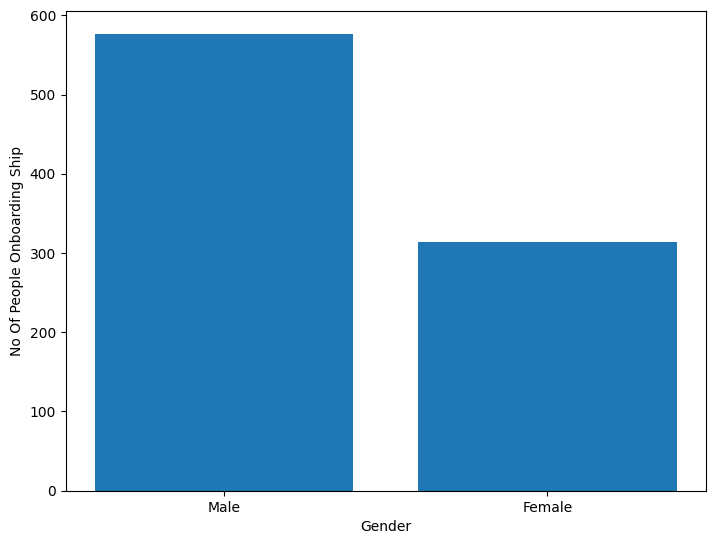

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel('Gender')
plt.ylabel('No Of People Onboarding Ship')
plt.show()

In [10]:
alive = len(train[train["Survived"]==1])
dead = len(train[train["Survived"]==0])

In [11]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


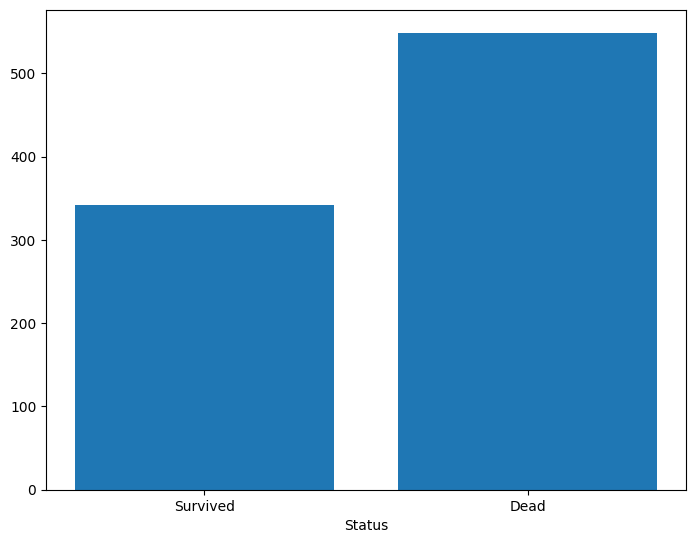

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ["Survived","Dead"]
ind= [alive,dead]
ax.bar(status,ind)
plt.xlabel('Status')
plt.show()

Text(0.5, 1.0, 'Bar graph pf people according to ticket class in which people could not survived')

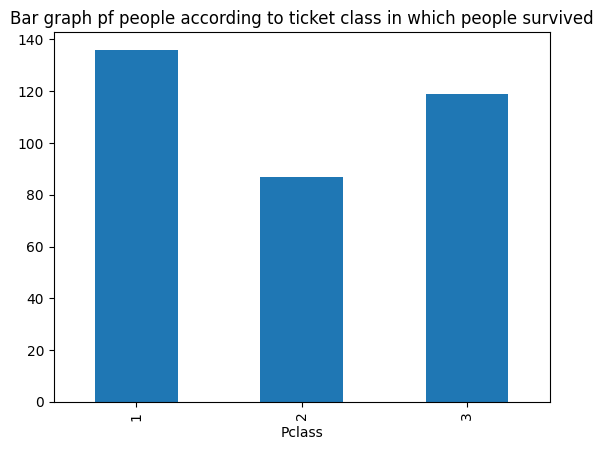

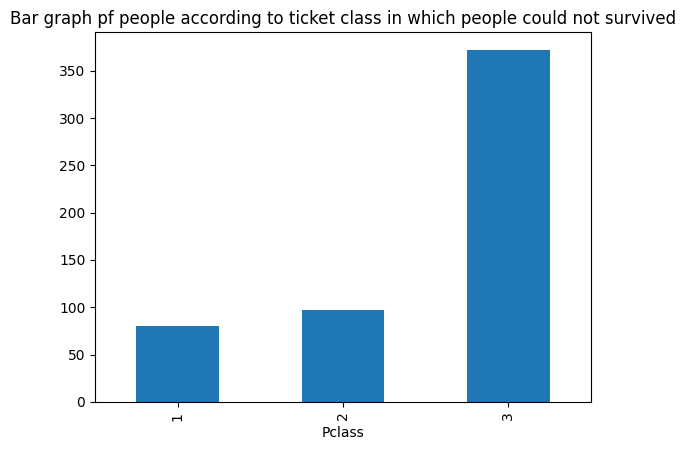

In [13]:
plt.figure(1)
train.loc[train["Survived"]==1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title("Bar graph pf people according to ticket class in which people survived")

plt.figure(2)
train.loc[train["Survived"]==0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title("Bar graph pf people according to ticket class in which people could not survived")

([<matplotlib.axis.XTick at 0x128f3fb8a10>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

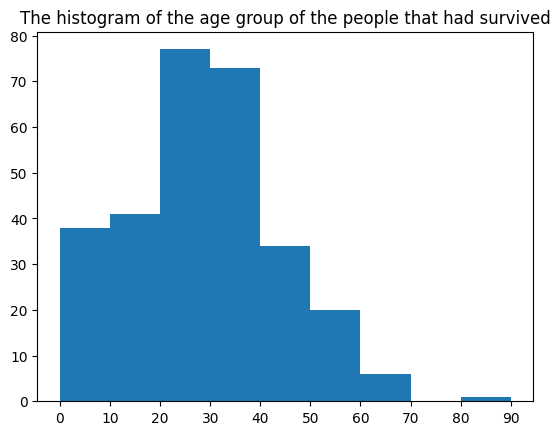

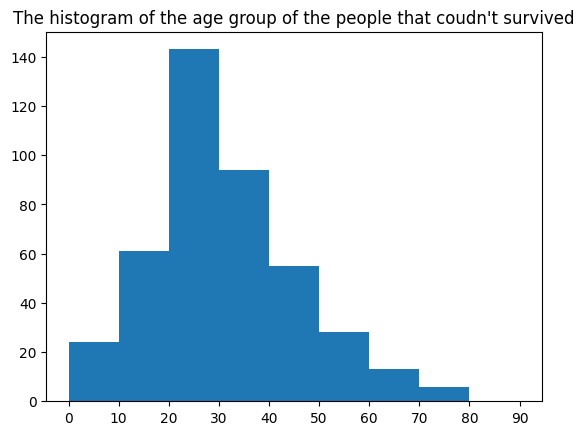

In [14]:
plt.figure(1)
age = train.loc[train.Survived== 1, 'Age']
plt.title("The histogram of the age group of the people that had survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = train.loc[train.Survived== 0, 'Age']
plt.title("The histogram of the age group of the people that coudn't survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [15]:
train[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[["Pclass","Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train[["Age","Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending = True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [18]:
train[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


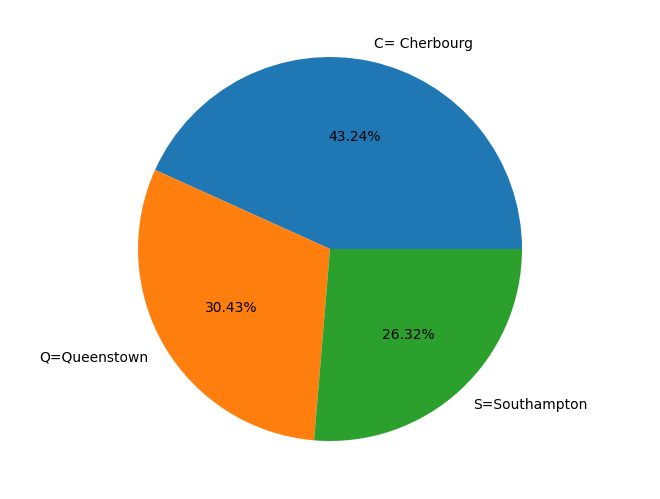

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C= Cherbourg', 'Q=Queenstown','S=Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

# Drop useless columns

In [20]:
train = train.drop(['Ticket'], axis= 1)
train = train.drop(['Cabin'], axis= 1)
train = train.drop(['Name'], axis= 1)

In [21]:
# Feature Selection
column_train = ['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']

# Training values
X=train[column_train]

# Target value
Y=train['Survived']

In [22]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [23]:
# Now we have to fill all the missing values
#age have 177 missing values
# we fill missing values with median from existing values
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [24]:
X['Embarked']=train['Embarked'].fillna(method = 'pad')
X['Embarked'].isnull().sum()

0

In [25]:
# We need to convert sex into integer value
d = {'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [26]:
e={'C':0, 'Q':1, 'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

# Training Testing and Spliting the model

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


# Confusion Matrix

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


# Using Support Vector

In [31]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y =  model1.predict(X_test)

print('Acc=', accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat= confusion_matrix(Y_test, pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



# Using KNN Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
print('Accuracy score:',accuracy_score(Y_test,y_pred2))

Accuracy score: 0.6604477611940298


In [35]:
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [36]:
# Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

print('Accuracy Score:',accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [37]:
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model4= DecisionTreeClassifier(criterion = 'entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

print('Accuracy Score:', accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [39]:
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [40]:
result = pd.DataFrame({'Model':['Logistic Regression','Suport vector Machines','Naive Bayes','KNN','Decision Tree'],
                      'Score':[0.75,0.66,0.76,0.66,0.74]})

result_df = result.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Suport vector Machines
0.66,KNN


"We can see that Naive Bayes Model Gives us maximum Score"

# Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model3,X,Y,cv=7)
print('Score:',score)
print('Mean Score:',score.mean())
print('Std deviation:',score.std())

Score: [0.7421875  0.8046875  0.78740157 0.77165354 0.79527559 0.76377953
 0.82677165]
Mean Score: 0.7845366985376828
Std deviation: 0.025922047962829254


# Saving Model

In [42]:
import joblib
joblib.dump(model3,'Titanic survived Project')

['Titanic survived Project']